# Data load - display and normalization

## Load libraries

In [2]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import csv
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
import nibabel as nib

## Loading the images
We have 3 types of images available:

* T1w pre-contrast
* FLAIR
* T1w post-contrast

The goal is to create a 4D image that contains all four 3D volumes we will use in our example

In [3]:
CurrentDir= os.getcwd()

# Print current directory
print (CurrentDir)

D:\Medical-Image-Tutorials\MachineLearningForMedicalImages-master\notebooks


In [37]:
# Create the file paths. The images are contained in a subfolder called Data. 
# TO DO: make this a function
PostName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data",  'POST.nii.gz')  )
PreName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'PRE.nii.gz') )
FLAIRName =  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'FLAIR.nii.gz') )
GroundTruth=  os.path.abspath(os.path.join(os.path.abspath(os.path.join(CurrentDir, os.pardir)), "Data", 'GroundTruth.nii.gz') )

In [5]:
PostName

'D:\\Medical-Image-Tutorials\\MachineLearningForMedicalImages-master\\Data\\POST.nii.gz'

In [6]:
PreName

'D:\\Medical-Image-Tutorials\\MachineLearningForMedicalImages-master\\Data\\PRE.nii.gz'

In [7]:
FLAIRName

'D:\\Medical-Image-Tutorials\\MachineLearningForMedicalImages-master\\Data\\FLAIR.nii.gz'

## Pre images

In [38]:
# read Pre in--we assume that all images are same x,y dims
Pre = nib.load(PreName)
# Pre is a class containing the image data among other information 
Pre=Pre.get_data()
xdim = np.shape(Pre)[0]
ydim = np.shape(Pre)[1]
zdim = np.shape(Pre)[2]
# Printing the dimensions of an image 
print(f'Dimensions: {xdim}, {ydim}, {zdim}')
# Normalize to mean
Pre=Pre/np.mean(Pre[np.nonzero(Pre)])

Dimensions: 240, 240, 155


C:\Users\deniz\AppData\Local\Temp/ipykernel_17528/4074791610.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  Pre=Pre.get_data()


In [30]:
Pre

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Post & Flair images

In [39]:
# Post
Post = nib.load(PostName)
Post=Post.get_data()
# Normalize to mean
Post=Post/np.mean(Post[np.nonzero(Post)])
Flair = nib.load(FLAIRName)
Flair=Flair.get_data()
# Normalize FLAIR 
Flair=Flair/np.mean(Flair[np.nonzero(Flair)])
print ("Data Loaded")

C:\Users\deniz\AppData\Local\Temp/ipykernel_17528/3388422037.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  Post=Post.get_data()
C:\Users\deniz\AppData\Local\Temp/ipykernel_17528/3388422037.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  Flair=Flair.get_data()


Data Loaded


In [28]:
Post

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [31]:
Flair

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Create training set

We assume the following labels:

* Enhancing Tumor = 4

* Edema = 2

* WM and CSF and GM=1

* Background (air) = 0

In [40]:
#  Load Ground Truth
GroundTrutha = nib.load(GroundTruth)
GroundTruth=GroundTrutha.get_data()
print ("Data Loaded")

Data Loaded


C:\Users\deniz\AppData\Local\Temp/ipykernel_17528/2555537840.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  GroundTruth=GroundTrutha.get_data()


## Plotting the images

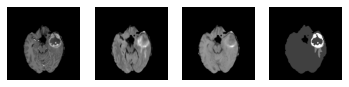

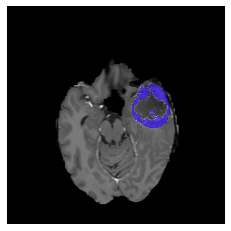

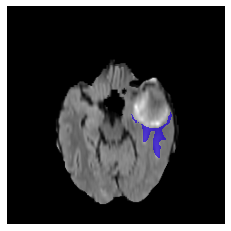

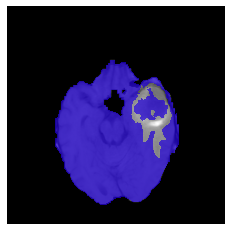

In [41]:
def display_overlay(Image1, Image2):
    """
    Function: Overlays Image2 over Image1
    Image 1: 2D image
    Image 2: 2D Image

    Requires numpy, matplotlib
    """
    Image1=np.rot90(Image1,3)
    Image2=np.rot90(Image2,3)
    Image2 = np.ma.masked_where(Image2 == 0, Image2)
    plt.imshow(Image1, cmap=plt.cm.gray)
    plt.imshow(Image2, cmap=plt.cm.brg, alpha=.7, vmin=.7, vmax=5, interpolation='nearest')
    plt.axis('off')
    plt.show()

f, (ax1,ax2,ax3,ax4)=plt.subplots(1,4)
ax1.imshow(np.rot90(Post[:, :, 55,],3), cmap=plt.cm.gray)
ax1.axis('off')
ax2.imshow(np.rot90(Flair[:, :, 55,],3), cmap=plt.cm.gray)
ax2.axis('off')
ax3.imshow(np.rot90(Pre[:, :, 55,],3), cmap=plt.cm.gray)
ax3.axis('off')
ax4.imshow(np.rot90(GroundTruth[:, :, 55,],3), cmap=plt.cm.gray)
ax4.axis('off')

plt.show()

display_overlay(Post[:, :, 55,], GroundTruth[:,:,55]==4)  
display_overlay(Flair[:, :, 55,], GroundTruth[:,:,55]==2)  
display_overlay(Pre[:, :, 55,], GroundTruth[:,:,55]==1)    

## Create dataset

In [42]:
# Create classes
# Tissue =GM+CSG+WM
ClassTissuePost=(Post[np.nonzero(GroundTruth==1)])
ClassTissuePre=(Pre[np.nonzero(GroundTruth==1)])
ClassTissueFlair=(Flair[np.nonzero(GroundTruth==1)])
# Enhancing Tumor 
ClassTumorPost=(Post[np.nonzero(GroundTruth==4)])
ClassTumorPre=(Pre[np.nonzero(GroundTruth==4)])
ClassTumorFlair=(Flair[np.nonzero(GroundTruth==4)])
# Edema 
ClassEdemaPost=(Post[np.nonzero(GroundTruth==2)])
ClassEdemaPre=(Pre[np.nonzero(GroundTruth==2)])
ClassEdemaFlair=(Flair[np.nonzero(GroundTruth==2)])
# We only select 1000 points for demosntration purposes
IND=np.random.randint(np.shape(ClassTumorPre)[0], size=5000)
ClassTissuePost=ClassTissuePost[IND]
ClassTissuePre=ClassTissuePre[IND]
ClassTissueFlair=ClassTissueFlair[IND]
ClassTumorPost=ClassTumorPost[IND]
ClassTumorPre=ClassTumorPre[IND]
ClassTumorFlair=ClassTumorFlair[IND]
ClassEdemaPost=ClassEdemaPost[IND]
ClassEdemaPre=ClassEdemaPre[IND]
ClassEdemaFlair=ClassEdemaFlair[IND]
print ("Saving the data to a pandas dataframe and subsequently to a csv")
# Create a dictionary containing the classes
datasetcomplete={"ClassTissuePost": ClassTissuePost, "ClassTissuePre": ClassTissuePre, "ClassTissueFlair": ClassTissueFlair, "ClassTumorPost": ClassTumorPost, "ClassTumorPre": ClassTumorPre, "ClassTumorFlair": ClassTumorFlair, "ClassEdemaPost": ClassEdemaPost, "ClassEdemaPre": ClassEdemaPre, "ClassEdemaFlair": ClassEdemaFlair}
datapd=pd.DataFrame.from_dict(datasetcomplete,orient="index")
# print (datapd)
datapd=datapd.transpose()
# datapd=pd.DataFrame(dict([ (k,Series(v)) for k,v in datasetcomplete.iteritems() ]))
datapd.to_csv("DataExample.csv",index=False)

Saving the data to a pandas dataframe and subsequently to a csv


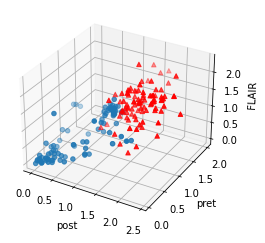

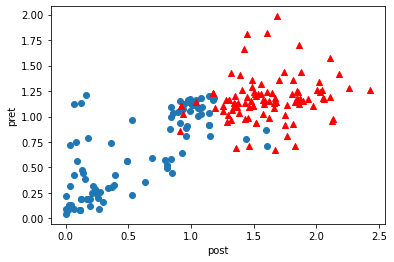

In [43]:
# Display Tumor vs NAWM
IND=np.random.randint(1000, size=100)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ClassTissuePost[IND,], ClassTissuePre[IND,], ClassTissueFlair[IND,])
ax.scatter(ClassTumorPost[IND,], ClassTumorPre[IND,], ClassTumorFlair[IND,], c='r', marker='^')
ax.set_xlabel('post')
ax.set_ylabel('pret')
ax.set_zlabel('FLAIR')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(ClassTissuePost[IND,], ClassTissuePre[IND,])
ax.scatter(ClassTumorPost[IND,], ClassTumorPre[IND,], c='r', marker='^')
ax.set_xlabel('post')
ax.set_ylabel('pret')
plt.show()

### Descriptive statistics: 

In [44]:
# descriptions
print(datapd.describe())

       ClassTissuePost  ClassTissuePre  ClassTissueFlair  ClassTumorPost  \
count      5000.000000     5000.000000       5000.000000     5000.000000   
mean          0.678505        0.735751          0.600106        1.608760   
std           0.424010        0.405540          0.441649        0.325298   
min           0.000000        0.002533          0.000000        0.420744   
25%           0.198120        0.355251          0.162183        1.376983   
50%           0.862615        0.816145          0.531986        1.597986   
75%           1.027426        1.107585          1.053256        1.826394   
max           2.011594        2.055752          1.874936        2.801992   

       ClassTumorPre  ClassTumorFlair  ClassEdemaPost  ClassEdemaPre  \
count    5000.000000      5000.000000     5000.000000    5000.000000   
mean        1.142995         1.402287        1.020012       1.099344   
std         0.231390         0.381349        0.125137       0.080800   
min         0.335215       